# Статистика, DS-поток
## Задание SP.8

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.



**Баллы за задание:**

* Задача 1 &mdash;  100 баллов
* Задача 2 &mdash;  120 баллов
* Задача 3 &mdash;  80 баллов

**Важность задач:**

* *высокая:* задачи 1-3.

<font color="red">**Напоминание**. В задачах могут быть "скрытые" критерии, то есть "заказчик" хочет что-то, что явно не указал в условии. Если вы внимательно следите за удобством восприятия информации в вашем решении, учитываете советы по оформлению и отрабатываете замечания проверяющих, вам не составит труда выполнить эти критерии.</font>

In [ ]:
# Bot check

# HW_ID: ds_sp8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [36]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

import warnings
warnings.filterwarnings('ignore')

_____
### Задача 5 из SP.7.

In [ ]:
<...>

_____
### Задача 1.

В одной известной компании поставлена задача построения нейросети для распознавания котиков и песиков. Для построения такого бинарного классификатора собрана коллекция изображений со сбалансированными классами.

Прошел месяц работы аналитиков и ML-разработчиков, и, наконец-то, нейросеть обучена и готова к использованию. Но руководство хочет убедится, что месяц работы прошел не зря, и построенная нейросеть действительно дает результат.
Как известно, случайный классификатор, выдающий для каждого объекта случайный класс, угадывает ответ правильно с вероятностью $1/2$. И руководству будет достаточно, если модель будет работать лучше. Однако, как их убедить в том, что та же точность 60% действительно отличается от 50%, а не вызвана чистой случайностью? На помощь приходит проверка статистических гипотез &mdash; вы можете проверить статистическую значимость отклонения от базовой точности 50%, и предъявить ее в качестве доказательства.

Сформулируем задачу на математическом языке. Пусть $X_1, ..., X_n \sim Bern(p)$ &mdash; результаты работы модели на тестовой выборке, где $X_i = 1$, если для $i$-го объекта модель правильно определила класс, а $p$ &mdash; неизвестная вероятность такого события.
Мы хотим проверить гипотезу $\mathsf{H}_0\colon p=1/2$ против альтернативы $\mathsf{H}_1\colon p>1/2$. Нулевая гипотеза означает, что построенный классификатор выдает рандомный ответ, а первая &mdash; что чаще все же выдает верный ответ.

На семинаре получено, что $S = \left\{T(x) \geqslant c_\alpha\right\}$, где $T(X) = \sum\limits_{i=1}^n X_i$, является равномерно наиболее мощным критерием для проверки этих гипотез.
Чему при этом равно $c_\alpha$? Учтите, что распределение дискретное, и строгий/нестрогий знак имеет значение.

Нам нужно соблюсти условие $P(T(x)\ge c_\alpha)\le \alpha$.

$T(X)$ имеет биномиальное распределение с $n$ степенями свободы и параметром $p$. Тогда:

$$
P(T(x)\ge c_\alpha)=1-P(T(x)< c_\alpha)=1-\sum_{k=0}^{c_\alpha-1}C_n^k p^k(1-p)^{n-k}\le \alpha
$$

Задача сводится к тому, чтобы найти квантиль $\alpha$ биномиального распределения с последующим округлением вверх.

Проверьте, что критерий работает.
Возьмите несколько значений $n$ и реализаций статистики $T(X)$.
В каждом случае найдите значение $c_\alpha$, а также выведите результат процедуры проверки гипотез 0/1 &mdash; отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).
Оформите это в виде таблицы, можно через `pandas.DataFrame`.

*Замечание:* Пользуйтесь функциями из `scipy.stats`.

In [21]:
n_range = [1, 2, 3, 5, 10, 15, 20, 25, 50, 100]
p = 0.6
alpha = 0.05
c = []
t = []
h = []
for n in n_range:
    c.append(sps.binom(n, p).ppf(alpha) + 1)
    exper = sps.bernoulli(p).rvs(n)
    t.append(np.sum(exper))
    h.append(1 if t[-1] >= c[-1] else 0)
pd.DataFrame(data={
    'c': c,
    'T(X)': t,
    'H0 отвергли?': h
}, index=n_range)


,c,T(X),H0 отвергли?
1,1.0,1,1
2,1.0,2,1
3,1.0,3,1
5,2.0,3,1
10,4.0,5,1
15,7.0,9,1
20,9.0,14,1
25,12.0,13,1
50,25.0,33,1
100,53.0,62,1


Теперь для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05. Сравните их.

Заметим, что $P(T(X)\ge c_\alpha)=1-P(T(X)<c_\alpha)=1-F(c_\alpha)+p(c_\alpha)$

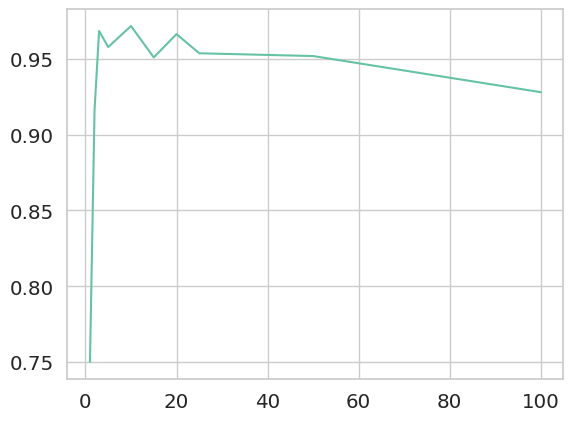

In [22]:
p_range = np.linspace(0.5, 1.0, 100)
power = []
for i, n in enumerate(n_range):
    power.append(np.mean(1 - sps.binom(n, p_range).cdf(c[i]) + sps.binom(n, p_range).pmf(c[i])))
plt.plot(n_range, power)


**Вывод:** мощность критерия сначала к 0.95, что соответствует желаемой ошибке. Значит, наш критерий удовлетворительный. Это показывается и экспериментом, где почти всегда нулевая гипотеза оказалась корректно отвергнута.

_____
### Задача 2.

На практике часто рассматривают асимптотические критерии, например, критерий Вальда. Такие критерии контролируют вероятность ошибки I рода на уровне $\alpha$ только в пределе, однако для небольших выборок она может сильно отличаться от $\alpha$, причем не редко в большую сторону. Поэтому для таких критериев возникает необходимость в вычислении значения вероятности ошибки I рода при конечной выборке.

Зачастую посчитать точное значение вероятности ошибки I рода довольно сложно, поэтому вместо него вычисляют оценку с помощью семплирования по методу Монте-Карло.

Пусть гипотеза $\mathsf{H}_0$ простая, то есть $\mathsf{H}_0\colon \mathsf{P} = \mathsf{P}_0$. Для ее проверки по конечной выборке $X_1, ..., X_n$ используется критерий $S$. **Опишите схему оценки вероятности ошибки I рода** критерия $S$ методом Монте-Карло.

1. Сгенерируем $m$ выборок размера $n$ из распределения $\mathsf{P}_0$.
2. Для каждой выборки определим, принадлежит ли она $S$. Пусть $k$ - число выборок, принадлежащих $S$.
3. Вычислим $\frac{k}{m}$ - это и будет оценка вероятности ошибки I рода.

Если гипотеза $\mathsf{H}_0$ сложная, то есть $\mathsf{H}_0\colon \mathsf{P} \in \mathscr{P}_0$, то можно повторить такую процедуру несколько раз для разных $\mathsf{P} \in \mathscr{P}_0$.

Рассмотрим альтернативную гипотезу $\mathsf{H}_1\colon \mathsf{P} \in \mathscr{P}_1$. **Опишите схему оценки мощности** критерия $S$ методом Монте-Карло.

1. Сгенерируем $m$ выборок размера $n$ из какого-нибудь распределения $\mathsf{P}\in \mathcal{P}_1$.
2. Для каждой выборки определим, принадлежит ли она $S$. Пусть $k$ - число выборок, принадлежащих $S$.
3. Вычислим $\frac{k}{m}$.
4. Повторим для $p$ распределений.
5. Далее остаётся вычислить среднее полученных вероятностей.

Пусть $X_1, ..., X_n$ &mdash; выборка из пуассоновского распределения с параметром $\theta$. Рассмотрим гипотезы $\mathsf{H}_0\colon \theta = 1\ \ vs.\ \ \mathsf{H}_1\colon \theta \not= 1$ и критерий Вальда для их проверки.

**1.** **Оцените вероятности ошибки I рода** критерия для размеров выборки $1 \leqslant n \leqslant 50$ и визуализируйте полученную зависимость.

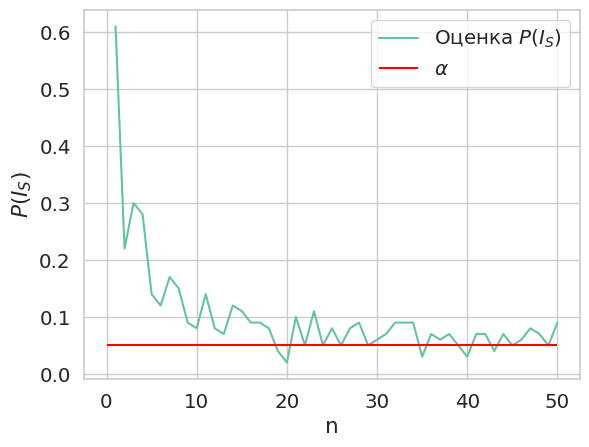

In [37]:
n_range = np.arange(1, 51)
m = 100
p = []
alpha = 0.05
for n in n_range:
    X = sps.poisson(1).rvs((m, n))
    theta = np.mean(X, axis=1)
    W = n * (theta - 1) ** 2 / np.var(X, axis=1)
    p.append(len(W[sps.chi2.cdf(W, df=1) > 1 - alpha]) / len(theta))
plt.plot(n_range, p, label='Оценка $P(I_S)$')
plt.hlines(0.05, 0, 50, color='red', label='$\\alpha$')
plt.xlabel('n')
plt.ylabel('$P(I_S)$')
plt.legend()
plt.show()

**Вывод:** ошибка первого рода с использованием критерия Вальда стремится с увеличением $n$ к желаемому уровню значимости $\alpha$.

**2.** Для значений $n \in \{5, 15, 50\}$ **оцените функцию мощности критерия** для значений $\theta \in (0, 5)$ по сетке с шагом 0.01 по методу Монте-Карло. Визуализируйте полученные зависимости.

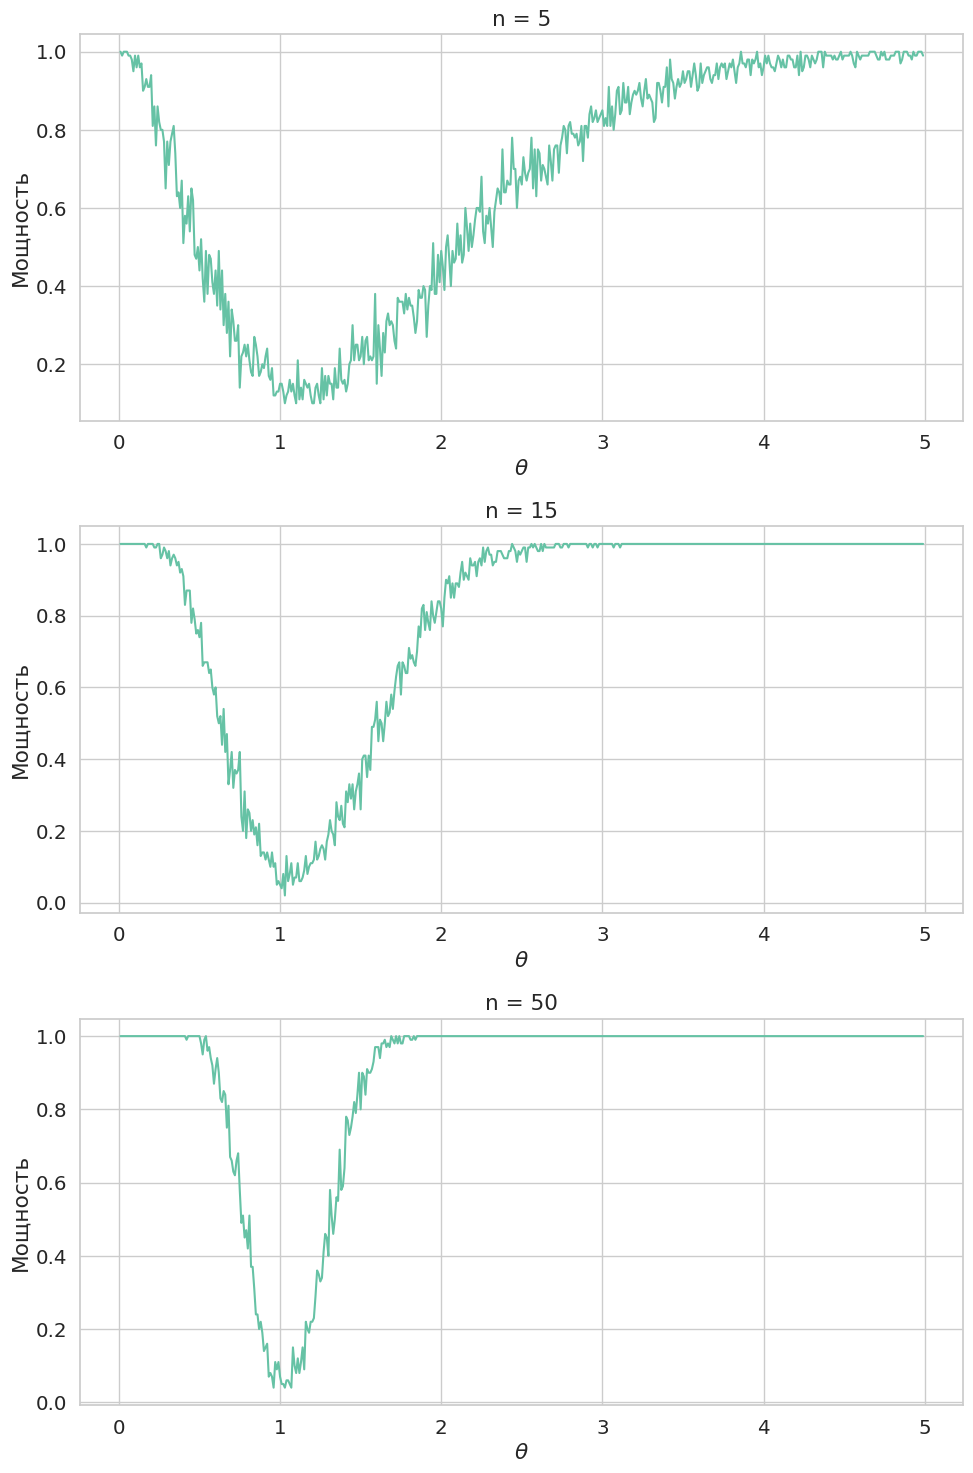

In [39]:
thetas = np.arange(0.01, 5, 0.01)
n_range = [5, 15, 50]
m = 100
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
for i, n in enumerate(n_range):
    power = []
    for theta in thetas:
        X = sps.poisson(theta).rvs((m, n))
        theta = np.mean(X, axis=-1)
        W = n * (theta - 1) ** 2 / np.var(X, axis=1)
        power.append(len(W[sps.chi2.cdf(W, df=1) > 1 - alpha]) / len(theta))
    ax[i].plot(thetas, power)
    ax[i].set_xlabel('$\\theta$')
    ax[i].set_ylabel('Мощность')
    ax[i].set_title(f'n = {n}')
plt.tight_layout()
plt.show()


**Вывод:** Вблизи значения, соответствующего нулевой гипотезе, мощность критерия закономерно проседает. Это связано с тем, что при близких к нулевой гипотезе истинных значениях параметра ожидаемо сложно разделить случаи - распределения слишком похожи. Чем больше выборка, тем уже область падения мощности, что связано с тем, что на большей выборке можно более точно определить отклонение от нулевой гипотезы.

**3.** Пусть $n=50$. **Сравните мощности критериев**, соответствующих двусторонней, левосторонней и правосторонней альтернативам.

In [59]:
power_both = []
power_left = []
power_right = []
n = 50
m = 100
for theta in np.arange(0.01, 5, 0.01):
    if theta == 1.0:
        continue
    X = sps.poisson(theta).rvs((m, n))
    est = np.mean(X, axis=-1)
    W = n * (est - 1) ** 2 / np.var(X, axis=1)
    power_both.append(len(W[sps.chi2.cdf(W, df=1) > 1 - alpha]) / len(est))
    if theta < 1.0:
        power_left.append(power_both[-1])
    else:
        power_right.append(power_both[-1])
print('Двусторонняя альтернатива: %.2f' % np.mean(power_both))
print('Левосторонняя альтернатива: %.2f' % np.mean(power_left))
print('Правосторонняя альтернатива: %.2f' % np.mean(power_right))

Двусторонняя альтернатива: 0.89
Левосторонняя альтернатива: 0.77
Правосторонняя альтернатива: 0.92


**Вывод:** хуже всего критерий отрабатывает в случае левосторонней альтернативы - мощность критерия оказывается ниже 0.8. Для правосторонней альтернативы, напротив, мощность критерия превосходит 0.9.

**Вопрос на подумать.** Сколько семплирований в методе Монте-Карло нужно сделать, чтобы оценить вероятности ошибки I рода с точностью до 0.001? Иначе говоря, значения (0.049, 0.051) можно принять за 0.05.

Семплирований следует сделать не менее 500, т.к. именно тогда мы сможем при делении получить погрешность $\pm 0.001$ (как половину шага)

_____
### Задача 3.

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\Gamma(\theta, \beta)$. Рассмотрим основную гипотезу $\mathsf{H}_0\colon \theta = 2$.

**1.** Пусть $\beta$ неизвестно. Для размеров выборки $n \in \{5, 15, 30, 50, 100\}$ **оцените вероятности ошибки I рода** критерия Вальда для двусторонней альтернативы в зависимости от истинных значений $\beta$. Визуализируйте полученные зависимости.

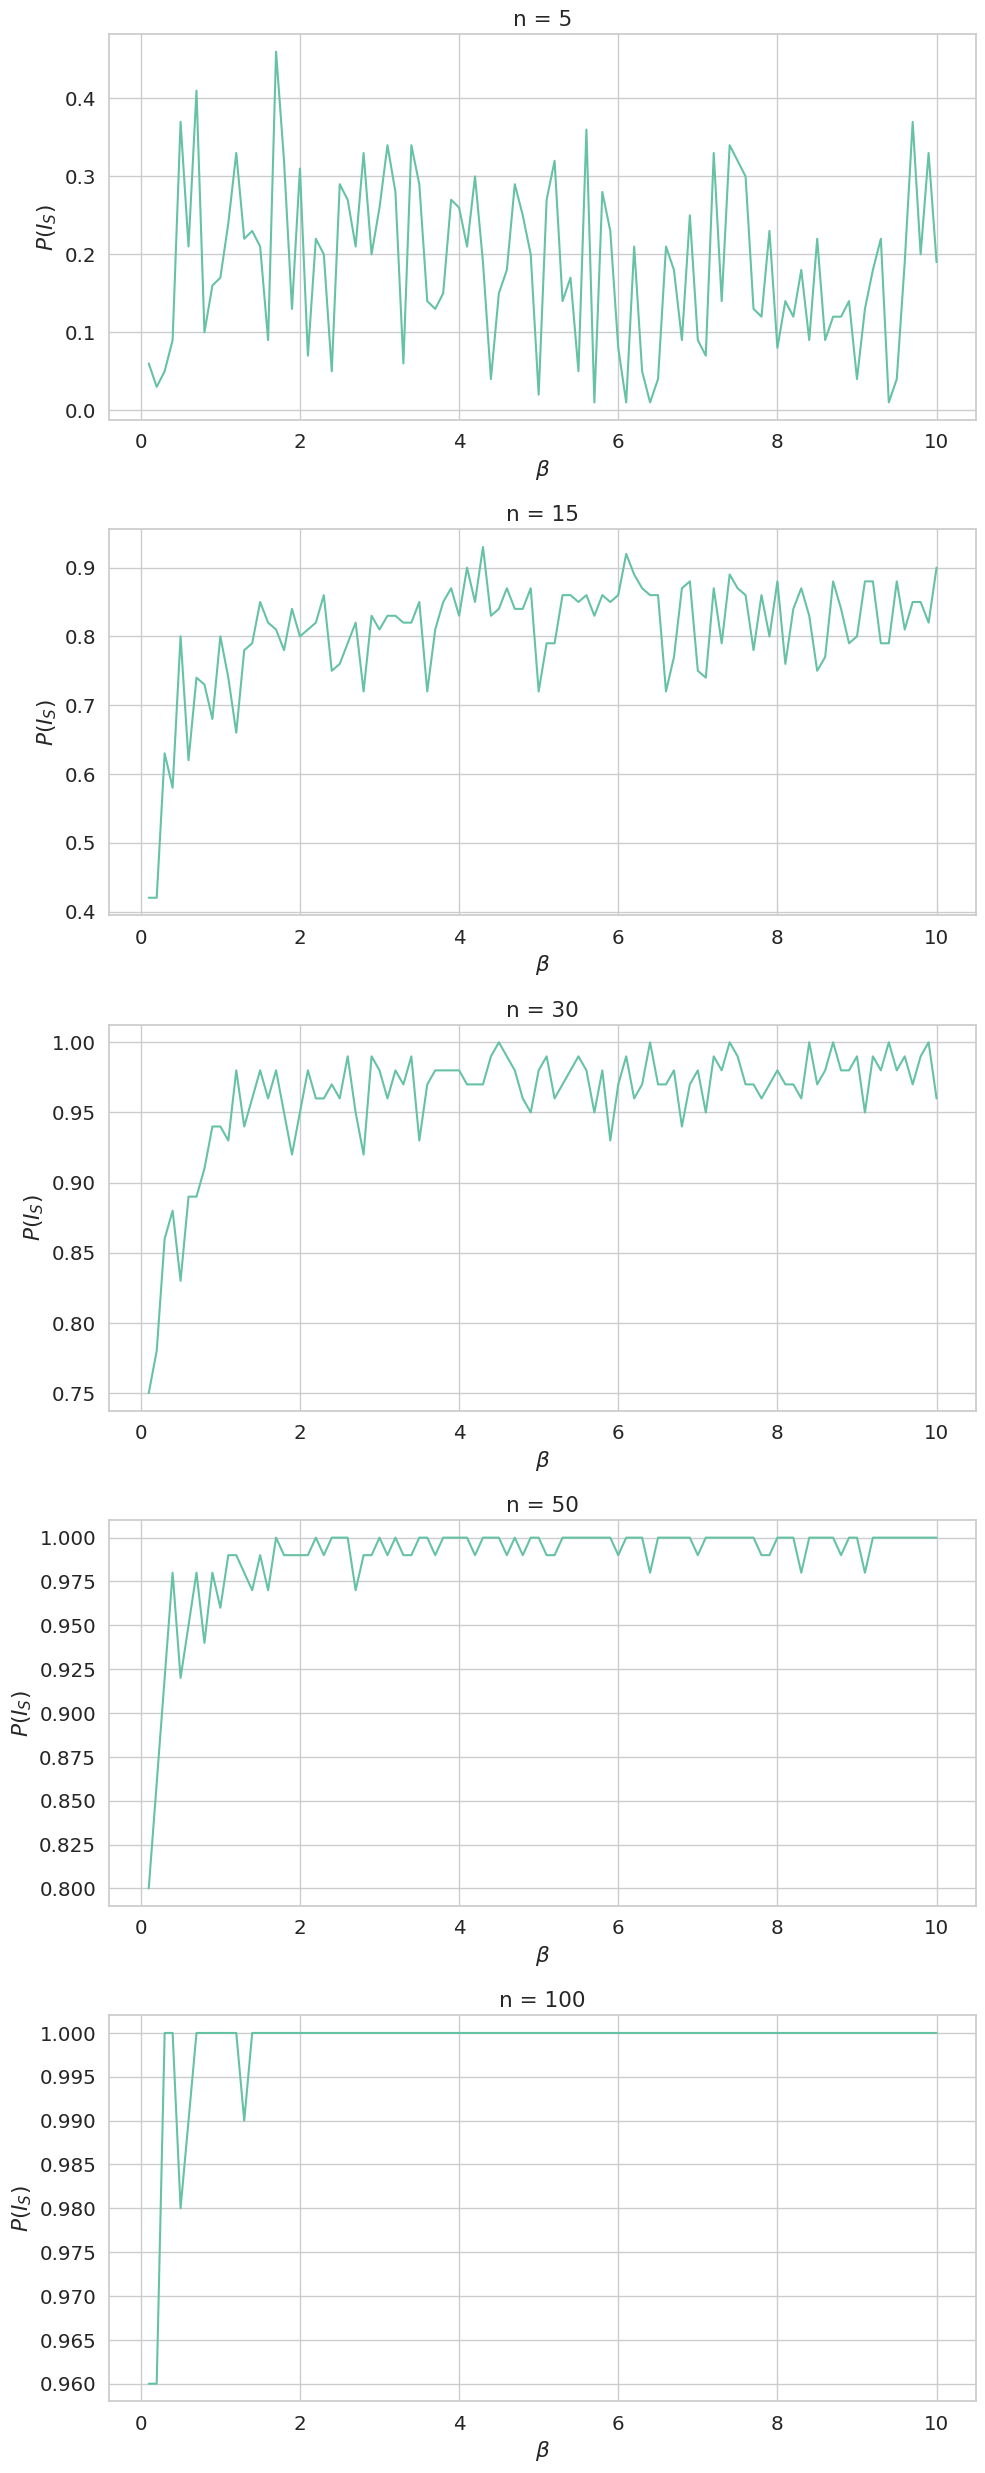

In [48]:
n_range = [5, 15, 30, 50, 100]
theta = 2
betas = np.linspace(0.1, 10, 100)
fig, ax = plt.subplots(5, 1, figsize=(10, 25))
m = 100
alpha = 0.05
for i, n in enumerate(n_range):
    err = []
    for beta in betas:
        X = sps.gamma(a=beta, scale=1/theta).rvs((m, n))
        est = np.mean(X, axis=-1) / (np.mean(X ** 2, axis=-1) - np.mean(X, axis=-1) ** 2)
        W = n * (est - 1) ** 2 / np.var(est, ddof=1)
        err.append(len(W[sps.chi2.cdf(W, df=1) > 1 - alpha]) / len(est))
    ax[i].plot(betas, err)
    ax[i].set_xlabel('$\\beta$')
    ax[i].set_ylabel('$P(I_S)$')
    ax[i].set_title(f'n = {n}')
plt.tight_layout()
plt.show()

**Вывод:** С увеличением $\beta$ вероятность ошибки первого рода возрастает, и чем больше размер выборки, тем быстрее вероятность ошибки достигает практически 1. Это связано с тем, что с ростом $\beta$ гамма-распределение "расплывается" (см. график на иллюстрации ниже), из-за чего возрастает разброс значений и, как следствие, разброс статистик.

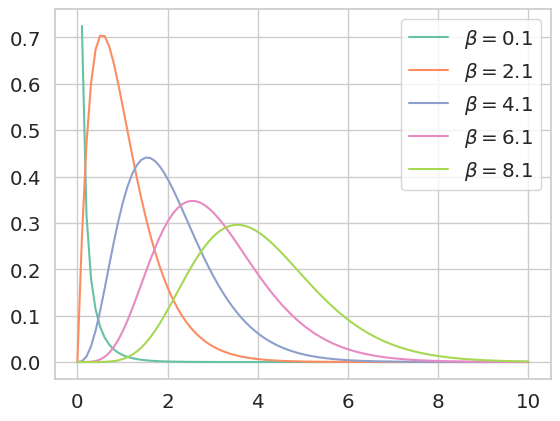

In [50]:
for beta in betas[::20]:
    x = np.linspace(0, 10, 100)
    plt.plot(x, sps.gamma(a=beta, scale = 1/2).pdf(x), label=f'$\\beta={beta}$')
plt.legend()
plt.show()

**2.** Пусть $\beta$ известно. **Сравните по мощности** РНМК и критерий Вальда (*для известной $\beta$*) для левосторонней и правосторонней альтернатив, а также двусторонней альтернативы для критерия Вальда.

Запишем отношение правдоподобия:

$$
\Lambda_{\theta_1,\theta_0}(X)=\prod_{i=1}^n \left(\frac{\theta_1}{\theta_0}\right)^\beta \exp\left[-(\theta_1-\theta_0)X_i\right]=\left(\frac{\theta_1}{\theta_0}\right)^{\beta n}\exp\left[-(\theta_1-\theta_0)\sum_{i=1}^n X_i\right]
$$

Получаем для правостороннего случая критерий из:

$$
\mathsf{P}_{\theta_0}(T(X)\le x_0)=\alpha
$$

А для левостороннего из:

$$
\mathsf{P}_{\theta_0}(T(X)\ge x_0)=\alpha
$$

In [62]:
b = 1.0
a = 2.0
n = 50
x0 = sps.gamma(a=n*b, scale=1/a).ppf(0.05)
print(x0)

19.482366291254316


In [66]:
power_both = {'wald': [], 'umf': []}
power_left = {'wald': [], 'umf': []}
power_right = {'wald': [], 'umf': []}
n = 50
m = 100
for theta in np.arange(0.01, 5, 0.01):
    if theta == 1.0:
        continue
    X = sps.gamma(a=1, scale=1/theta).rvs((m, n))
    est = 1 / np.mean(X, axis=-1)

    W = n * (est - 2) ** 2 / np.var(X, axis=1)
    power_both['wald'].append(len(W[sps.chi2.cdf(W, df=1) > 1 - alpha]) / len(est))
    if theta < 2.0:
        power_left['wald'].append(power_both['wald'][-1])
    else:
        power_right['wald'].append(power_both['wald'][-1])

    t = np.sum(X, axis=-1)
    if theta < 2.0:
        power_left['umf'].append(len(t[t >= x0]) / len(t))
        power_both['umf'].append(len(t[t >= x0]) / len(t))
    else:
        power_right['umf'].append(len(t[t <= x0]) / len(t))
        power_both['umf'].append(len(t[t <= x0]) / len(t))
for lst in [power_both, power_left, power_right]:
    for key in ['wald', 'umf']:
        lst[key] = np.mean(lst[key])
pd.DataFrame(data=[power_both, power_left, power_right], index=['Двусторонняя', 'Левосторонняя', 'Правосторонняя'])

,wald,umf
Двусторонняя,0.916687,0.882068
Левосторонняя,0.863636,0.996667
Правосторонняя,0.951700,0.806433


Для двусторонней альтернативы мощности рассматриваются отдельно для $\theta_1<\theta_0$ и $\theta_1>\theta_0$.

**Вывод:** для двусторонней и правосторонней альтернатив оценка по Вальду дала результат лучше, чем наиболее мощный критерий 